# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

In [0]:
!ls

car_data.csv  sample_data


In [0]:
"""
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
#"""

'\nfrom google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))\n#'

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]
#target = pd.get_dummies(target)
print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [0]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,234,93,42,64,158,68,9,134,49,18,142,163,268,170,71,7,13,192,201
1,789,90,39,85,160,59,7,163,41,20,131,189,396,158,71,7,13,186,192
2,360,108,52,109,182,55,12,216,31,24,171,229,687,214,72,10,28,189,201
3,599,93,39,63,146,58,7,128,52,18,134,149,246,158,63,9,7,198,204
4,770,80,44,68,120,53,8,151,45,19,146,170,333,190,80,4,16,180,185
5,46,91,43,70,133,55,8,130,51,18,146,159,253,156,70,1,8,190,194
6,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
7,418,87,43,70,169,72,7,152,44,19,145,177,341,171,76,6,12,184,187
8,111,94,48,83,162,64,10,156,43,19,153,177,357,187,74,4,14,185,196
9,59,85,39,68,119,52,5,128,53,18,135,148,241,142,75,8,8,182,187


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [0]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.588342,93.360656,44.637523,81.728597,167.510018,61.482696,8.506375,167.806922,41.234973,20.495446,147.433515,187.642987,434.602914,173.785064,72.606557,6.315118,12.766849,188.779599,195.422587
std,246.179786,8.396275,6.220825,15.870631,33.289572,7.663913,4.640984,33.281687,7.881269,2.579127,14.703817,31.680834,176.521010,33.154159,7.861369,4.916174,8.932651,6.174224,7.608097
min,0.000000,77.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,39.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,136.000000,167.000000,317.000000,147.000000,67.000000,2.000000,6.000000,184.000000,189.000000
50%,424.000000,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,145.000000,177.000000,357.000000,173.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,637.000000,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,586.000000,195.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,261.000000,61.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [0]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [0]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Масштабируем фичи во избежении превосходства одних над другими и ускорения обучения
import matplotlib.pyplot as plt
import seaborn as sns
normalizer = preprocessing.MinMaxScaler(feature_range=(-1,1))
X_train_norm_np = normalizer.fit_transform(X_train)
X_train_norm_pd = pd.DataFrame(data=X_train_norm_np)
X_test_norm_np = normalizer.transform(X_test)
X_test_norm_pd = pd.DataFrame(data=X_test_norm_np)
#Масштабируем фичи во избежении превосходства одних над другими и ускорения обучения

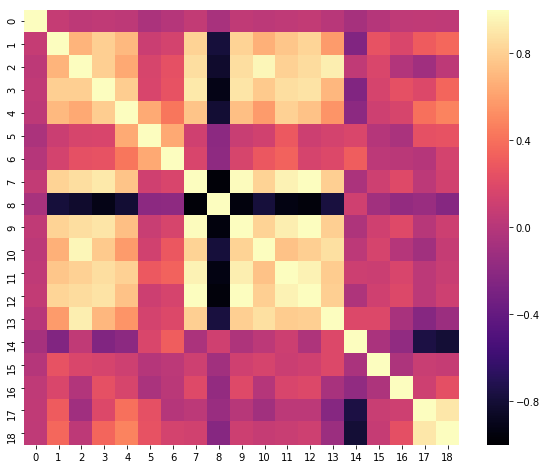

In [0]:
#Проверим фичи на коррелированность
corr = X_train_norm_pd.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=1, vmin=-1, square=True, cmap='magma')

In [0]:
high_corr_idx = [7, 9] #Уровень корреляции фичей 7, 9, 12 больше 0.99 по модулю
#Убирём эти фиши для уменьшеня шума и увеличения устойчивости
X_train_prep_pd = X_train_norm_pd.drop(high_corr_idx, 1)
X_test_prep_pd = X_test_norm_pd.drop(high_corr_idx, 1)

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, f1_score, auc
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [0]:
tuned_parameters = { 'C' : [0.1, 1, 10, 100, 1000, 10000]}
clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5)
clf.fit(X_train_prep_pd, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
clf.best_params_

{'C': 1000}

In [0]:
print('score:', clf.score(X_test_prep_pd, y_test))
print('weighted f1 score:', f1_score(y_test, clf.predict(X_test_prep_pd), average='weighted'))

score: 0.7710437710437711
weighted f1 score: 0.7702820126835858


In [0]:
target_types = np.unique(target)
print(target_types)

['bus' 'opel' 'saab' 'van']


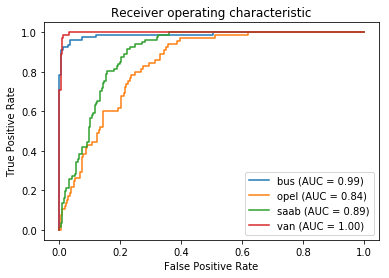

In [0]:
def show_roc(clf, X_test, y_test):
  target_types = np.unique(y_test)
  for i in range(4):
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, i], pos_label=target_types[i])
    area = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (target_types[i], area))
  plt.xlim([-0.05, 1.05])
  plt.ylim([-0.05, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()

show_roc(clf, X_test_prep_pd, y_test)

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [0]:
from sklearn.decomposition import  PCA

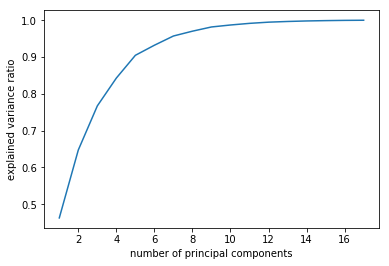

[0.46295009 0.64757874 0.76732657 0.84295041 0.90476621 0.93212325
 0.95718541 0.97029636 0.98173468 0.98709234 0.99152549 0.99478056
 0.99666185 0.99806669 0.99897329 0.99964591 1.        ]


In [0]:
# Отметим, что в данном случае PCA применяется к масштабированным фичам во избежании большей дисперсии по определённым направлениям.
# Также отметим, что если применить PCA к немасштабированным данным, то в данном случае точность классификаци упадёт более чем в два раза.
pca = PCA()
pca.fit(X_train_prep_pd)
variance = pca.explained_variance_ratio_
features_num = len(variance)
for i in range(features_num - 1):
  variance[i+1] += variance[i]
plt.xlabel('number of principal components')
plt.ylabel('explained variance ratio')
plt.plot(np.arange(features_num) + 1, variance)
plt.show()
print(variance)

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [0]:
# Оставим первые 11 компонент, тк они описывают большую (>99%) часть дисперсии.
n_pca = 11
pca = PCA(n_components=n_pca)
pca.fit(X_train_prep_pd)
X_test_pca = pca.transform(X_test_prep_pd)
X_train_pca = pca.transform(X_train_prep_pd)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [0]:
tuned_parameters = { 'C' : [0.1, 1, 10, 100, 1000, 10000]}
clf_pca = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5)
clf_pca.fit(X_train_pca, y_train)
print('Лучший параметр регуляризации:', clf_pca.best_params_)
print('Точность классификации упала примерно на 7%')
print('score:', clf_pca.score(X_test_pca, y_test))
print('weighted f1 score:', f1_score(y_test, clf_pca.predict(X_test_pca), average='weighted'))

Лучший параметр регуляризации: {'C': 10}
Точность классификации упала примерно на 7%
score: 0.7070707070707071
weighted f1 score: 0.6954865583853265


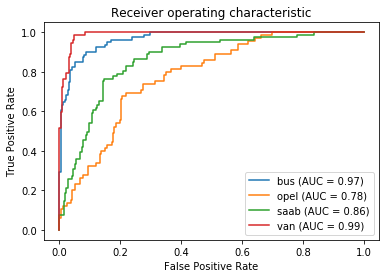

ROC кривая тоже уменьшила свою площадь


In [0]:
show_roc(clf_pca, X_test_pca, y_test)
print('ROC кривая тоже уменьшила свою площадь')

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

Предобработанные данные
Лучший параметр: {'max_depth': 5}
score: 0.622895622895623
weighted f1 score: 0.6323377617318413


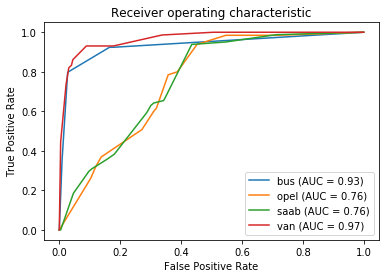

Исходные данные
Лучший параметр: {'max_depth': 5}
score: 0.622895622895623
weighted f1 score: 0.6323988176118319


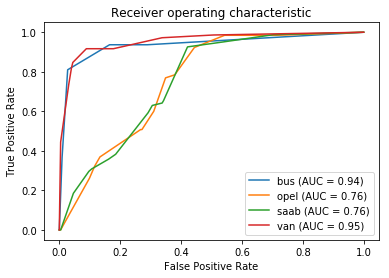

PCA данные
Лучший параметр: {'max_depth': 14}
score: 0.5622895622895623
weighted f1 score: 0.5715806255362693


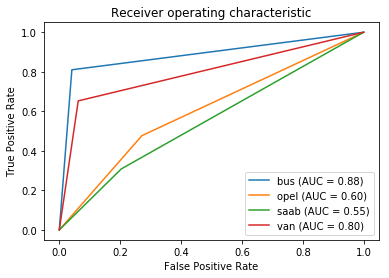

In [0]:
from sklearn.tree import DecisionTreeClassifier
max_depth=2
tuned_parameters = { 'max_depth' : [1, 2, 3, 4, 5, 6, 7, 9, 12, 14, 17]}
clf_tree = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5)
print('Предобработанные данные')
clf_tree.fit(X_train_prep_pd, y_train)
print('Лучший параметр:', clf_tree.best_params_)
print('score:', clf_tree.score(X_test_prep_pd, y_test))
print('weighted f1 score:', f1_score(y_test, clf_tree.predict(X_test_prep_pd), average='weighted'))
show_roc(clf_tree, X_test_prep_pd, y_test)
print('Исходные данные')
clf_tree.fit(X_train, y_train)
print('Лучший параметр:', clf_tree.best_params_)
print('score:', clf_tree.score(X_test, y_test))
print('weighted f1 score:', f1_score(y_test, clf_tree.predict(X_test), average='weighted'))
show_roc(clf_tree, X_test, y_test)
print('PCA данные')
clf_tree.fit(X_train_pca, y_train)
print('Лучший параметр:', clf_tree.best_params_)
print('score:', clf_tree.score(X_test_pca, y_test))
print('weighted f1 score:', f1_score(y_test, clf_tree.predict(X_test_pca), average='weighted'))
show_roc(clf_tree, X_test_pca, y_test)

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [0]:
from sklearn.ensemble import BaggingClassifier

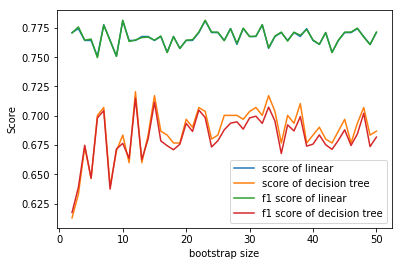

Лучшее количество будстрапированных выборок.
Решающие деревья: 12 (score 0.7205387205387206 ).
Логистическая регрессия: 10 (score 0.7811447811447811 ).


In [0]:
linear_score = []
tree_score = []
linear_f1 = []
tree_f1 = []
linear_max = (0, 0)
tree_max = (0, 0)
for i in range(2, 51):
  clf_b = BaggingClassifier(LogisticRegression(C=100), n_estimators=i, bootstrap=True, bootstrap_features=False)
  clf_b.fit(X_train_prep_pd, y_train)
  linear_score.append(clf_b.score(X_test_prep_pd, y_test))
  linear_f1.append(f1_score(y_test, clf_b.predict(X_test_prep_pd), average='weighted'))
  if linear_max[1] < linear_score[-1]:
    linear_max = (i, linear_score[-1])
  clf_b = BaggingClassifier(DecisionTreeClassifier(max_depth=7), n_estimators=i, bootstrap=True, bootstrap_features=False)
  clf_b.fit(X_train_prep_pd, y_train)
  tree_score.append(clf_b.score(X_test_prep_pd, y_test))
  tree_f1.append(f1_score(y_test, clf_b.predict(X_test_prep_pd), average='weighted'))
  if tree_max[1] < tree_score[-1]:
    tree_max = (i, tree_score[-1])
  
plt.plot(range(2, 51), linear_score, label='score of linear')
plt.plot(range(2, 51), tree_score, label='score of decision tree')
plt.plot(range(2, 51), linear_f1, label='f1 score of linear')
plt.plot(range(2, 51), tree_f1, label='f1 score of decision tree')
plt.xlabel('bootstrap size')
plt.ylabel('Score')
plt.legend(loc="lower right")
plt.show()
print('Лучшее количество будстрапированных выборок.')
print('Решающие деревья:', tree_max[0], '(score', tree_max[1], ').')
print('Логистическая регрессия:', linear_max[0], '(score', linear_max[1], ').') 

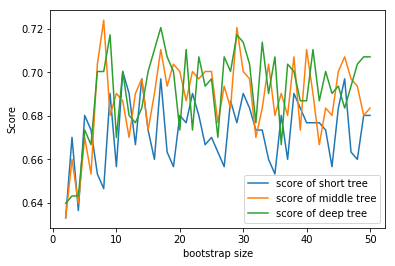

Из графика видно, что глубокие, переобученные деревья показывают в среднем более хороший результат на бэггинге.


In [0]:
short_tree_score = []
middle_tree_score = []
deep_tree_score = []
for i in range(2, 51):
  clf_b = BaggingClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=i, bootstrap=True, bootstrap_features=False)
  clf_b.fit(X_train_prep_pd, y_train)
  short_tree_score.append(clf_b.score(X_test_prep_pd, y_test))
  
  clf_b = BaggingClassifier(DecisionTreeClassifier(max_depth=7), n_estimators=i, bootstrap=True, bootstrap_features=False)
  clf_b.fit(X_train_prep_pd, y_train)
  middle_tree_score.append(clf_b.score(X_test_prep_pd, y_test))
  
  clf_b = BaggingClassifier(DecisionTreeClassifier(max_depth=20), n_estimators=i, bootstrap=True, bootstrap_features=False)
  clf_b.fit(X_train_prep_pd, y_train)
  deep_tree_score.append(clf_b.score(X_test_prep_pd, y_test))
  
plt.plot(range(2, 51), short_tree_score, label='score of short tree')
plt.plot(range(2, 51), middle_tree_score, label='score of middle tree')
plt.plot(range(2, 51), deep_tree_score, label='score of deep tree')
plt.xlabel('bootstrap size')
plt.ylabel('Score')
plt.legend(loc="lower right")
plt.show()
print('Из графика видно, что глубокие, переобученные деревья показывают в среднем более хороший результат на бэггинге.')

Отдельно отметим, что в случае с логистической регрессией бэггинг не даёт существенный улучшений качества, на 1-2%. В случае же с деревьями прирост качества значительный, до 10%.

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

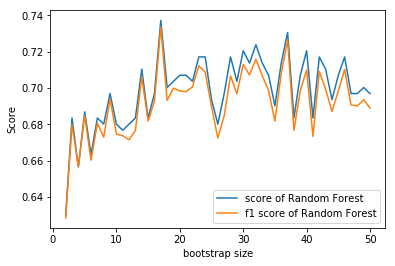

Лучшее количество деревьев: 17 (score 0.7373737373737373 ).


In [0]:
from sklearn.ensemble import RandomForestClassifier
max_iter = 50
tree_score = []
tree_f1 = []
tree_max = (0, 0)
for i in range(2, max_iter + 1):
  clf_b = RandomForestClassifier(n_estimators=i)
  clf_b.fit(X_train_prep_pd, y_train)
  tree_score.append(clf_b.score(X_test_prep_pd, y_test))
  tree_f1.append(f1_score(y_test, clf_b.predict(X_test_prep_pd), average='weighted'))
  if tree_max[1] < tree_score[-1]:
    tree_max = (i, tree_score[-1])
  
plt.plot(range(2, max_iter + 1), tree_score, label='score of Random Forest')
plt.plot(range(2, max_iter + 1), tree_f1, label='f1 score of Random Forest')
plt.xlabel('bootstrap size')
plt.ylabel('Score')
plt.legend(loc="lower right")
plt.show()
print('Лучшее количество деревьев:', tree_max[0], '(score', tree_max[1], ').') 

Отметим, что случайный лес показывает себя лучше беггинга над деревьями. Уже при ~15-20 деревьях он выдаёт устойчиво хорошее качество. Конкретно на этих данных, лес и бэггинг над деревьями перестают улучшать результат примерно на одинаковом количестве бутстрапированных выборок.


#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [0]:
from sklearn.utils import shuffle

X_train_prep_pd, y_train = shuffle(X_train_prep_pd, y_train, random_state=0)
train_size = len(y_train)

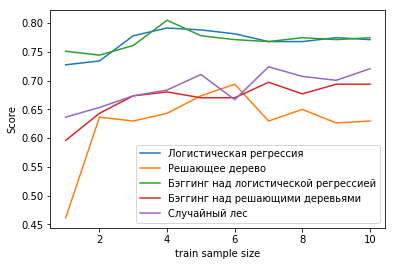

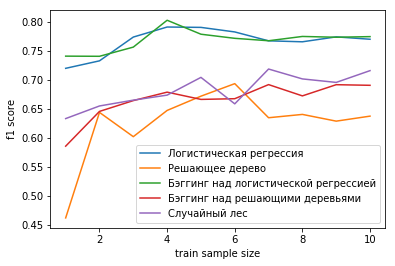

In [0]:
logistic_score=[]
tree_score=[]
bagging_logistic_score=[]
bagging_tree_score=[]
random_forest_score=[]
logistic_f1=[]
tree_f1=[]
bagging_logistic_f1=[]
bagging_tree_f1=[]
random_forest_f1=[]

for i in range(1, 11):
  n_features=round(train_size * i / 10)

  clf = LogisticRegression(C=1000).fit(X_train_prep_pd[:n_features], y_train[:n_features])
  logistic_score.append(clf.score(X_test_prep_pd, y_test))
  logistic_f1.append(f1_score(y_test, clf.predict(X_test_prep_pd), average='weighted'))
  
  clf = DecisionTreeClassifier(max_depth=5).fit(X_train_prep_pd[:n_features], y_train[:n_features])
  tree_score.append(clf.score(X_test_prep_pd, y_test))
  tree_f1.append(f1_score(y_test, clf.predict(X_test_prep_pd), average='weighted'))
  
  clf = BaggingClassifier(LogisticRegression(C=1000), n_estimators=10).fit(X_train_prep_pd[:n_features], y_train[:n_features])
  bagging_logistic_score.append(clf.score(X_test_prep_pd, y_test))
  bagging_logistic_f1.append(f1_score(y_test, clf.predict(X_test_prep_pd), average='weighted'))
  
  clf = BaggingClassifier(DecisionTreeClassifier(max_depth=17), n_estimators=17).fit(X_train_prep_pd[:n_features], y_train[:n_features])
  bagging_tree_score.append(clf.score(X_test_prep_pd, y_test))
  bagging_tree_f1.append(f1_score(y_test, clf.predict(X_test_prep_pd), average='weighted'))
  
  clf = RandomForestClassifier(n_estimators=17).fit(X_train_prep_pd[:n_features], y_train[:n_features])
  random_forest_score.append(clf.score(X_test_prep_pd, y_test))
  random_forest_f1.append(f1_score(y_test, clf.predict(X_test_prep_pd), average='weighted'))

plt.plot(range(1, 11), logistic_score, label='Логистическая регрессия')
plt.plot(range(1, 11), tree_score, label='Решающее дерево')
plt.plot(range(1, 11), bagging_logistic_score, label='Бэггинг над логистической регрессией')
plt.plot(range(1, 11), bagging_tree_score, label='Бэггинг над решающими деревьями')
plt.plot(range(1, 11), random_forest_score, label='Случайный лес')
plt.xlabel('train sample size')
plt.ylabel('Score')
plt.legend(loc="lower right")
plt.show()
plt.plot(range(1, 11), logistic_f1, label='Логистическая регрессия')
plt.plot(range(1, 11), tree_f1, label='Решающее дерево')
plt.plot(range(1, 11), bagging_logistic_f1, label='Бэггинг над логистической регрессией')
plt.plot(range(1, 11), bagging_tree_f1, label='Бэггинг над решающими деревьями')
plt.plot(range(1, 11), random_forest_f1, label='Случайный лес')
plt.xlabel('train sample size')
plt.ylabel('f1 score')
plt.legend(loc="lower right")
plt.show()

Основной результат заключается в том, что с ростом размера обучающей выборки качество классификации в среднем ростёт. Однако отметим, что при увеличении размера выборки и преодолении отметки примерно в половину данных качесто классификации не сильно увеличивается. 

Сравним алгоритмы основанные на деревьях. Лучший результат, как и ожидалось, даёт случайный лес. Это происходит за счёт рандомизации по фичам и по элементам выборки. В Бэггинге над решающими деревьями есть рандомизация по выборкам, что даёт превосходство над обычным решающим деревом.

Два алгоритма, основанные на логистической регрессии показывают примерно одинаковый результат. 